<a href="https://colab.research.google.com/github/AlbertoASandoval/Almacenando-Datos-En-El-Navegador/blob/projectoInicial/Robot_Trading_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font color='cyan' style='font-size: 66px;'> **Robot Trading**</font>

## <font color='deepskyblue' style='font-size: 33px;'>  1 - Configurar el Ambiente</font>

---

### <font color='darkgrey' style='font-size: 33px;'> 1.1 Configurando el Ambiente</font>

- Definir las variables Globales



1.   global     
2.   precio_actual
3.   tendencia
4.   media_bitcoin
5.   algoritmo_decision
6.   df_bitcoin


### <font color='darkgrey' style='font-size: 33px;'> 1.2 Importando librerias</font>

In [33]:

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import yfinance as yf                                 #Datos

import requests
from bs4 import BeautifulSoup                         #Webscraping

from IPython.display import clear_output
import time



### <font color='darkgrey' style='font-size: 33px;'> 1.3 Comprobacion de las Librerias</font>

In [ ]:

!python -V
print('---')
!pip show Pandas | grep 'Name\|Version'
print('---')
!pip show Numpy | grep 'Name\|Version'
print('---')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.12
---
Name: pandas
Version: 1.5.3
---
Name: numpy
Version: 1.23.5
---
Name: matplotlib
Version: 3.7.1


## <font color='deepskyblue' style='font-size: 33px;'>  2 - Obtencion de Datos</font>

---

- Utilizaremos la biblioteca yfinance de Phyton, para extraer el historico de precios del Bitcoin en dolares BTC-USD

- Extraeremos el historico de 7 dias en intervalos de 5 min

- Se guardara en el dataframe df_bitcoin

### <font color='darkgrey' style='font-size: 33px;'> 2.1 Importar la base historica del Bitcoin</font>

In [ ]:

# Crear la función importar_base_bitcoin()

def importar_base_bitcoin():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  btcnUsd = yf.Ticker("BTC-USD")
  df_bitcoin = btcnUsd.history(period="7d", interval = "5m")

importar_base_bitcoin()
df_bitcoin



,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-10-10 00:00:00+00:00,27589.201172,27606.626953,27589.201172,27599.025391,0,0.0,0.0
2023-10-10 00:05:00+00:00,27594.962891,27627.582031,27589.503906,27627.582031,26801152,0.0,0.0
2023-10-10 00:10:00+00:00,27635.033203,27635.033203,27583.824219,27583.824219,17104896,0.0,0.0
2023-10-10 00:15:00+00:00,27584.701172,27596.203125,27584.701172,27588.859375,12485632,0.0,0.0
2023-10-10 00:20:00+00:00,27593.828125,27619.398438,27593.828125,27619.398438,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-16 18:40:00+00:00,28391.244141,28391.244141,28368.208984,28384.232422,45815808,0.0,0.0
2023-10-16 18:45:00+00:00,28383.634766,28437.589844,28383.634766,28437.167969,24254464,0.0,0.0
2023-10-16 18:50:00+00:00,28443.052734,28536.816406,28443.052734,28532.439453,91121664,0.0,0.0


In [ ]:
df_bitcoin.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1957.000000,1957.000000,1957.000000,1957.000000,1.957000e+03,1957.0,1957.0
mean,27081.236987,27090.308022,27072.716535,27081.737075,2.096414e+07,0.0,0.0
std,391.730189,397.020768,387.030509,392.579653,1.113030e+08,0.0,0.0
min,26561.099609,26595.152344,26558.320312,26569.714844,0.000000e+00,0.0,0.0
25%,26814.619141,26822.437500,26807.626953,26814.324219,0.000000e+00,0.0,0.0
50%,26895.550781,26898.484375,26891.771484,26895.351562,4.776960e+05,0.0,0.0
75%,27281.558594,27296.333984,27273.828125,27280.076172,1.428224e+07,0.0,0.0
max,29388.390625,29448.138672,29388.390625,29448.138672,3.318054e+09,0.0,0.0


La función de Python, llamada importar_base_bitcoin(), realiza lo siguiente:

- Importa las variables globales df_bitcoin, precio_actual, tendencia, media_bitcoin y algoritmo_decision para que puedan ser utilizadas y modificadas dentro de la función.

- Utiliza la biblioteca yfinance, importada previamente para obtener datos históricos de precios de Bitcoin en relación con el dólar estadounidense (BTC-USD). Estos datos se almacenan en el DataFrame de Pandas llamado df_bitcoin.

- La función se utiliza para obtener datos históricos de precios de Bitcoin durante los últimos 7 días con un intervalo de 5 minutos. Estos datos se almacenan en el DataFrame df_bitcoin.

- No retorna ningún valor explícito, pero los datos históricos de Bitcoin quedan disponibles en el DataFrame df_bitcoin.

- Después de llamar a la función importar_base_bitcoin(), se puede acceder a los datos históricos de Bitcoin ejecutando df_bitcoin. Estos datos estarán disponibles para su posterior procesamiento o análisis.



## <font color='deepskyblue' style='font-size: 33px;'>  3 - WebScraping


1.   Calculo del Precio Actual del Bitcoin
2.   Calculo de la Tendencia del Bitcoin


</font>

---

 - Utilizando la biblioteca BeautifulSoup realizamos el Web Scraping de la página https://coinmarketcap.com/ para extraer el precio actual del Bitcoin BTC en dólares USD y la variación de su precio en la última hora 1h . El precio debe convertirse a "float" y guardarse en la variable llamada "precio_actual". La variable "tendencia" guarda el valor de 'baja', si la variación del precio es negativa, sino, guarda el valor de 'alta'.

### <font color='darkgrey' style='font-size: 33px;'> 3.1 WebScraping extrayendo los datos</font>

- Para eliminar los caracteres no numéricos (como "$" y ",") y devolver el valor como un número decimal (por ejemplo, 27071.70).

In [111]:
def limpiar_precio(raw):
  return float(raw.replace("$", "").replace(",",""))

sc-a0353bbc-0 gDrtaY, sc-a0353bbc-0 gDrtaY fall, sc-a0353bbc-0 gDrtaY rise

In [112]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}
url = 'https://coinmarketcap.com'
respuesta = requests.get(url, headers=headers)
s = BeautifulSoup(respuesta.content, features='lxml')
respuesta = s.findAll('p', {'class':'sc-4984dd93-0 kKpPOn coin-item-symbol'})


In [113]:
indice=0
for item in respuesta:
  if item.getText()=='BTC':
    break
  indice+=1
print('La posición actual del bitcoin en la tabla es: ', indice)

La posición actual del bitcoin en la tabla es:  0


In [114]:
respuesta = s.findAll('div', {'class':['sc-a0353bbc-0 gDrtaY', 'sc-a0353bbc-0 gDrtaY fall', 'sc-a0353bbc-0 gDrtaY rise']})
precio_actual=float(respuesta[indice].getText().replace('$','').replace(',',''))
print('El precio actual del bitcoin es: ', precio_actual)

El precio actual del bitcoin es:  28440.08


In [115]:
lista = []
respuesta = s.findAll('span', {'class':['sc-d55c02b-0 gUnzUB']})
for item in respuesta[::3]:
  lista.append(item)
  print(item)


<span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width:12px;height:18px;display:inline-block"></span>0.01%</span>
<span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width:12px;height:18px;display:inline-block"></span>0.00%</span>


In [116]:
tendencia = ''
if lista[indice].find('span')['class'][0] == 'icon-Caret-down':
  tendencia = 'baja'
else:
  tendencia = 'alta'
print('La tendencia actual del bitcoin es: ', tendencia)

La tendencia actual del bitcoin es:  baja


In [117]:
def extraer_tendencias():
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'
    }
    url = 'https://coinmarketcap.com'

respuesta = requests.get(url, headers=headers)
s = BeautifulSoup(respuesta.content, features='lxml')
respuesta = s.findAll('p', {'class':'sc-4984dd93-0 kKpPOn coin-item-symbol'})

indice=0
for item in respuesta:
  if item.getText()=='BTC':
    break
  indice+=1

# Calculando la tendencia exclusivamente del Bitcoin
respuesta = s.findAll('div', {'class':['sc-a0353bbc-0 gDrtaY', 'sc-a0353bbc-0 gDrtaY fall', 'sc-a0353bbc-0 gDrtaY rise']})
precio_actual=float(respuesta[indice].getText().replace('$','').replace(',',''))

lista = []
respuesta = s.findAll('span', {'class':['sc-d55c02b-0 gUnzUB']})
for item in respuesta[::3]:
    lista.append(item)


tendencia = ''
if lista[indice].find('span')['class'][0] == 'icon-Caret-down':
  tendencia = 'baja'
else:
  tendencia = 'alta'


print('El precio actual del bitcoin es: ', precio_actual)
print('La tendencia actual del bitcoin es: ', tendencia)



El precio actual del bitcoin es:  28440.08
La tendencia actual del bitcoin es:  baja


extraer_tendencias(), se encarga de obtener información sobre la tendencia del precio actual de Bitcoin desde el sitio web "coinmarketcap.com".

- Se importan las variables globales, incluyendo df_bitcoin, precio_actual, tendencia, media_bitcoin, y algoritmo_decision.

- Creamos un diccionario "header" que contiene información del agente de usuario (user-agent) para simular una solicitud de navegador web. Esto se hace para evitar restricciones de acceso en algunos sitios web.

- Definimos la variable url, que es la URL de la página web de "coinmarketcap.com" que se va a raspar "scrape".

- Se utiliza la biblioteca requests para hacer una solicitud HTTP a la URL especificada, incluyendo los encabezados definidos en headers. Luego, se verifica si la solicitud fue exitosa (sin errores) con response.raise_for_status().

- Se crea un objeto BeautifulSoup (soup) a partir del contenido HTML de la página web obtenido en la respuesta de la solicitud.

- La función busca un párrafo que contiene la palabra "Bitcoin" en el HTML de la página y encuentra la celda que lo contiene, así como la siguiente celda que contiene el precio actual de Bitcoin. El precio se almacena en la variable global precio_actual después de llamar a la función limpiar_precio() para eliminar cualquier símbolo o formato no deseado.

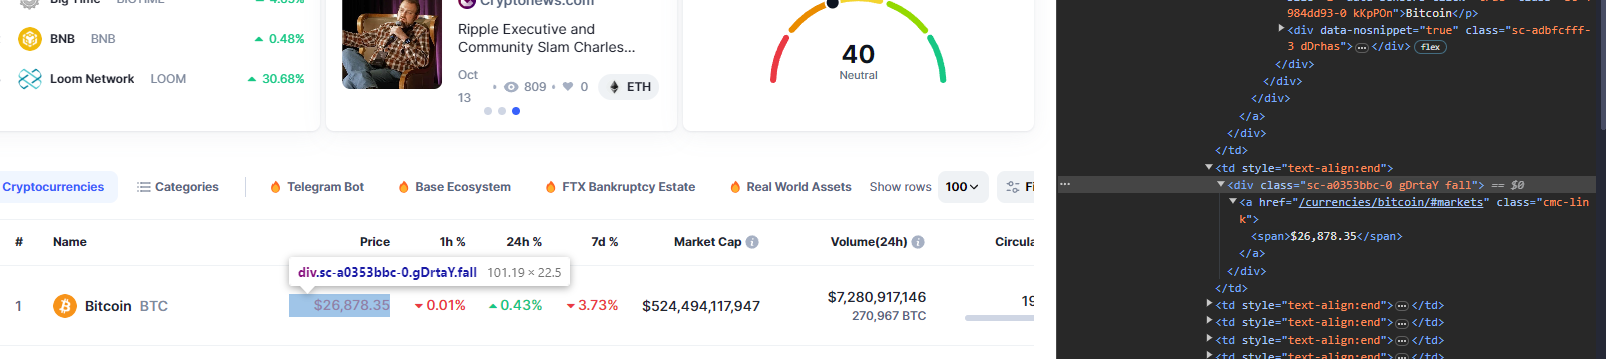

- Luego, la función busca etiquetas HTML que contienen información sobre la tendencia de precios de Bitcoin. Estas etiquetas se almacenan en una lista que creamos llamada lista.

- La función itera a través de la lista,  con bombre "lista" y verifica si la clase CSS de la etiqueta HTML indica una tendencia al alza o a la baja. La tendencia se almacena en la variable global tendencia como "alta" o "baja", dependiendo de la clase CSS encontrada en el primer elemento de lista.

En resumen, esta función raspa "scrape"  la página de "coinmarketcap.com" para obtener el precio actual y la tendencia de precios de Bitcoin y almacena esta información en las variables globales.

In [118]:

def extraer_tendencias2():
 global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
 headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
 url = 'https://coinmarketcap.com'
 response = requests.get(url, headers=headers)
 response.raise_for_status() #se detiene en caso de error
 soup = BeautifulSoup(response.content, 'lxml')
 parrafoBtc = soup.find("p", string="Bitcoin")
 columnaBtc = parrafoBtc.find_parent("tr")
 columna_precio = columnaBtc.find_next_sibling()
 precio_actual2 = limpiar_precio(columna_precio.text)

 #Calculando la tendencia exclusivamente del Bitcoin
 lista = []
 respuesta = s.findAll('span', {'class':['sc-a0353bbc-0 gDrtaY', 'sc-a0353bbc-0 gDrtaY fall', 'sc-a0353bbc-0 gDrtaY rise']})
 for item2 in respuesta[::3]:
    lista.append(item2)

 tendenciaBeau = ''
 indice=0
 if lista[indice].find('span')['class'][0] == 'icon-Caret-down':
   tendenciaBeau = 'baja'
 else:
   tendenciaBeau = 'alta'

In [119]:
print(precio_actual, tendencia)

28440.08 baja


sc-d55c02b-0 gUnzUB

In [120]:
def extraer_tendencias3():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'
    }

    url = 'https://coinmarketcap.com'

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Se detiene en caso de error
        soup = BeautifulSoup(response.content, 'lxml')

        # Buscar información de Bitcoin
        parrafo_btc = soup.find("p", string="Bitcoin")
        columna_btc = parrafo_btc.find_parent("tr")
        columna_precio = columna_btc.find_next_sibling()
        precio_actual_3 = limpiar_precio(columna_precio.text)

        # Calculando la tendencia exclusivamente del Bitcoin
        lista = soup.find_all('div', class_=['sc-a0353bbc-0 gDrtaY', 'sc-a0353bbc-0 gDrtaY fall', 'sc-a0353bbc-0 gDrtaY rise'])

        tendencia3 = 'alta' if 'icon-Caret-down' in lista[0].find('span')['class'] else 'baja'

        return precio_actual_3, tendencia3

    except requests.exceptions.RequestException as e:
        print(f'Error al hacer la solicitud web: {e}')
        return None, None

In [121]:
def limpiar_precio(raw):
    # Elimina todo lo que no sea un número, punto decimal o coma
    cleaned_price = ''.join(c for c in raw if c.isdigit() or c in ['.', ','])
    # Reemplaza la coma con un punto para obtener un número flotante válido
    cleaned_price = cleaned_price.replace(',', '.')
    return float(cleaned_price)

In [124]:
precio_actual_3, tendencia3 = extraer_tendencias3()

if precio_actual_3 is not None and tendencia3 is not None:
    print(f'Precio actual de Bitcoin: {precio_actual_3}')
    print(f'Tendencia de Bitcoin: {tendencia3}')
else:
    print('No se pudo obtener la información de Bitcoin.')

ValueError: ignored

In [ ]:
print( extraer_tendencias3)

## <font color='deepskyblue' style='font-size: 33px;'>  4 - WebScraping


1.   Calculo del Precio Actual del Bitcoin
2.   Calculo de la Tendencia del Bitcoin


</font>

---